# Feature Engineering

### Task# 1

a. Read data from: https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/BarChart.xlsx

b. import pandas, numpy, and sklearn

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk

In [ ]:
df = pd.read_excel('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/BarChart.xlsx')
df.head(5)

,Sales,StoreBranch,Year,Product
0,98,StoreA,2019,W
1,67,StoreA,2019,X
2,83,StoreA,2019,Y
3,86,StoreA,2019,Z
4,98,StoreB,2019,W


### Task# 2

a. Apply Lable encoding on the 'Product' field.

b. Apply Lable encoding on the 'StoreBranch' field.

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Product_label'] = label_encoder.fit_transform(df['Product'])

In [ ]:
df['StoreBranch'] = label_encoder.fit_transform(df['StoreBranch'])

In [ ]:
df.head(5)

,Sales,StoreBranch,Year,Product,Product_label
0,98,0,2019,W,0
1,67,0,2019,X,1
2,83,0,2019,Y,2
3,86,0,2019,Z,3
4,98,1,2019,W,0


### Task# 3

a. Apply Onehot encoding on the 'Product' field.

b. What different do you observe between label encoding and onehot encoding on your dataset?

In [ ]:
One_hot_encoder = preprocessing.OneHotEncoder()
Encoded_data = pd.DataFrame(One_hot_encoder.fit_transform(df[['Product']]).toarray(),
                            columns=One_hot_encoder.get_feature_names_out(['Product']))

In [ ]:
New_df = df.join(Encoded_data)
New_df.head(5)

,Sales,StoreBranch,Year,Product,Product_label,Product_W,Product_X,Product_Y,Product_Z
0,98,0,2019,W,0,1.0,0.0,0.0,0.0
1,67,0,2019,X,1,0.0,1.0,0.0,0.0
2,83,0,2019,Y,2,0.0,0.0,1.0,0.0
3,86,0,2019,Z,3,0.0,0.0,0.0,1.0
4,98,1,2019,W,0,1.0,0.0,0.0,0.0


In [ ]:
New_df.drop('Product_label', axis=1, inplace=True)
New_df.head(5)

,Sales,StoreBranch,Year,Product,Product_W,Product_X,Product_Y,Product_Z
0,98,0,2019,W,1.0,0.0,0.0,0.0
1,67,0,2019,X,0.0,1.0,0.0,0.0
2,83,0,2019,Y,0.0,0.0,1.0,0.0
3,86,0,2019,Z,0.0,0.0,0.0,1.0
4,98,1,2019,W,1.0,0.0,0.0,0.0


### Task# 4

a. Create dummy variables on 'Product' field.

b. Create a correlation matrix and heatmap on Newly encoded fields.

In [ ]:
dummy_df = pd.get_dummies(df, columns=['Product'])
dummy_df.head(5)

,Sales,StoreBranch,Year,Product_label,Product_W,Product_X,Product_Y,Product_Z
0,98,0,2019,0,True,False,False,False
1,67,0,2019,1,False,True,False,False
2,83,0,2019,2,False,False,True,False
3,86,0,2019,3,False,False,False,True
4,98,1,2019,0,True,False,False,False


In [ ]:
correlation = dummy_df.corr()
correlation

,Sales,StoreBranch,Year,Product_label,Product_W,Product_X,Product_Y,Product_Z
Sales,1.000000,1.484736e-01,1.423384e-01,-3.841289e-03,8.855505e-02,-1.664835e-01,7.722001e-02,7.084404e-04
StoreBranch,0.148474,1.000000e+00,1.293410e-14,-1.773239e-17,-3.433862e-17,-2.289241e-18,-2.289241e-18,-4.578483e-18
Year,0.142338,1.293410e-14,1.000000e+00,5.227508e-15,-5.549121e-15,1.172092e-15,-7.188218e-16,4.889819e-15
Product_label,-0.003841,-1.773239e-17,5.227508e-15,1.000000e+00,-7.745967e-01,-2.581989e-01,2.581989e-01,7.745967e-01
Product_W,0.088555,-3.433862e-17,-5.549121e-15,-7.745967e-01,1.000000e+00,-3.333333e-01,-3.333333e-01,-3.333333e-01
Product_X,-0.166484,-2.289241e-18,1.172092e-15,-2.581989e-01,-3.333333e-01,1.000000e+00,-3.333333e-01,-3.333333e-01
Product_Y,0.077220,-2.289241e-18,-7.188218e-16,2.581989e-01,-3.333333e-01,-3.333333e-01,1.000000e+00,-3.333333e-01
Product_Z,0.000708,-4.578483e-18,4.889819e-15,7.745967e-01,-3.333333e-01,-3.333333e-01,-3.333333e-01,1.000000e+00


# Interaction Variable

### Task# 5

a. Create interactive variable between store and product.

In [ ]:
df['Store_Product'] = df['StoreBranch']*df['Product_label']
df.head(5)

,Sales,StoreBranch,Year,Product,Product_label,Store_Product
0,98,0,2019,W,0,0
1,67,0,2019,X,1,0
2,83,0,2019,Y,2,0
3,86,0,2019,Z,3,0
4,98,1,2019,W,0,0


### Task# 6

a. Create interactive variable between store and productX.

In [ ]:
New_df['Store_ProductX'] = New_df['StoreBranch']*New_df['Product_X']
New_df.head(5)

,Sales,StoreBranch,Year,Product,Product_W,Product_X,Product_Y,Product_Z,Store_ProductX
0,98,0,2019,W,1.0,0.0,0.0,0.0,0.0
1,67,0,2019,X,0.0,1.0,0.0,0.0,0.0
2,83,0,2019,Y,0.0,0.0,1.0,0.0,0.0
3,86,0,2019,Z,0.0,0.0,0.0,1.0,0.0
4,98,1,2019,W,1.0,0.0,0.0,0.0,0.0


# Feature Scaling

### Log Normal
For Normal Distribution:

     Mean = μ ,

     Std = σ,

     Skewness = 0,

     Kurtosis = 3


### Task# 7

a. Read data from https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/CAR%20DETAILS.csv

b. Create a histogram on Selling price field.

d. Is this field following proper normal distribution.

In [ ]:
car = pd.read_csv('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/CAR%20DETAILS.csv')
car

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,Petrol,Individual,Manual,First Owner
1,135000,50000,Petrol,Individual,Manual,First Owner
2,600000,100000,Diesel,Individual,Manual,First Owner
3,250000,46000,Petrol,Individual,Manual,First Owner
4,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner
4336,409999,80000,Diesel,Individual,Manual,Second Owner
4337,110000,83000,Petrol,Individual,Manual,Second Owner
4338,865000,90000,Diesel,Individual,Manual,First Owner


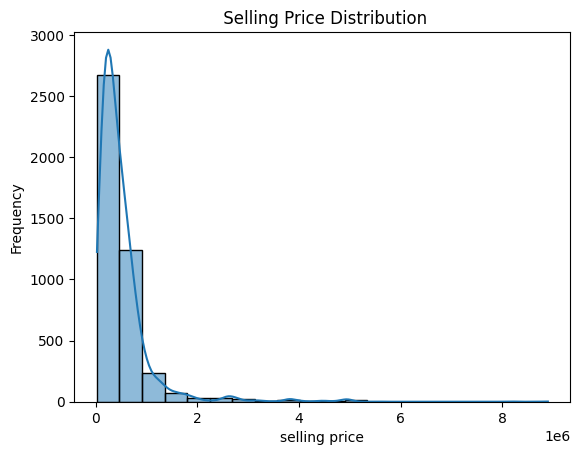

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.histplot(car['selling_price'], bins = 20, edgecolor = 'black', kde=True)
plt.title(' Selling Price Distribution')
plt.xlabel('selling price')
plt.ylabel('Frequency')
plt.show()

### Task# 8


a. Compute skewness and kurtosis of selling_price field.

b. Is this field following normally distribution?

In [ ]:
skewness = car['selling_price'].skew()
skewness

4.892021472306356

In [ ]:
kurtosis = car['selling_price'].kurtosis()
kurtosis

37.08754263212727

### Task# 9

a. Apply log transformation on selling price field and create log_selling_price.

b. Compute skewness and kurtosis

c. Create a histogram on log_selling_price.

d. Do you think normality has been achieved?

In [ ]:
car['log_sales'] = np.log(car['selling_price'])
car

,selling_price,km_driven,fuel,seller_type,transmission,owner,log_sales
0,60000,70000,Petrol,Individual,Manual,First Owner,11.002100
1,135000,50000,Petrol,Individual,Manual,First Owner,11.813030
2,600000,100000,Diesel,Individual,Manual,First Owner,13.304685
3,250000,46000,Petrol,Individual,Manual,First Owner,12.429216
4,450000,141000,Diesel,Individual,Manual,Second Owner,13.017003
...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,12.923910
4336,409999,80000,Diesel,Individual,Manual,Second Owner,12.923910
4337,110000,83000,Petrol,Individual,Manual,Second Owner,11.608236
4338,865000,90000,Diesel,Individual,Manual,First Owner,13.670485


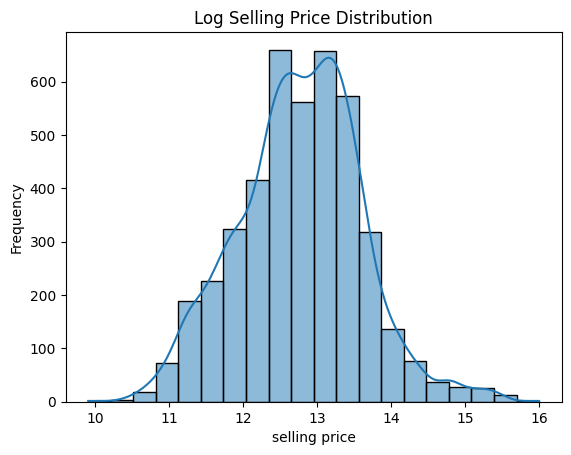

In [ ]:
sn.histplot(car['log_sales'], bins = 20, edgecolor = 'black', kde=True)
plt.title('Log Selling Price Distribution')
plt.xlabel('selling price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean = car['log_sales'].mean()
mean

std = car['log_sales'].std()
std

skewness = car['log_sales'].skew()
skewness

kurtosis = car['log_sales'].kurtosis()
kurtosis

print(f"Mean: {mean}, \nStandard Deviation: {std}, \nSkewness: {skewness}, \nKurtosis: {kurtosis}")

Mean: 12.764184314373875, 
Standard Deviation: 0.8392653516128741, 
Skewness: 0.06016301220961387, 
Kurtosis: 0.269201172157687


### Standard Normal (Standardization)
For Standard Normal Distribution:

     Mean = 0 ,

     Std = 1,

     Skewness = 0,

     Kurtosis = 3

### Task# 10

a. Apply standard scaler on selling price field and create std_selling_price.

b. Compute  Mean and standard deviation on std_selling_price.

c. Create a histogram on std_selling_price.

d. Do you think standard normality has been achieved?

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the features
scaler = StandardScaler()
car['std_selling_price'] = label_encoder.fit_transform(car['selling_price'])
car

,selling_price,km_driven,fuel,seller_type,transmission,owner,log_sales,std_selling_price
0,60000,70000,Petrol,Individual,Manual,First Owner,11.002100,17
1,135000,50000,Petrol,Individual,Manual,First Owner,11.813030,60
2,600000,100000,Diesel,Individual,Manual,First Owner,13.304685,236
3,250000,46000,Petrol,Individual,Manual,First Owner,12.429216,114
4,450000,141000,Diesel,Individual,Manual,Second Owner,13.017003,193
...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,12.923910,178
4336,409999,80000,Diesel,Individual,Manual,Second Owner,12.923910,178
4337,110000,83000,Petrol,Individual,Manual,Second Owner,11.608236,48
4338,865000,90000,Diesel,Individual,Manual,First Owner,13.670485,318


In [ ]:
mean = car['std_selling_price'].mean()
mean

std = car['std_selling_price'].std()
std

skewness = car['std_selling_price'].skew()
skewness

kurtosis = car['std_selling_price'].kurtosis()
kurtosis

print(f"Mean: {mean}, \nStandard Deviation: {std}, \nSkewness: {skewness}, \nKurtosis: {kurtosis}")

Mean: 173.84930875576038, 
Standard Deviation: 102.44003912094966, 
Skewness: 0.5505960636793461, 
Kurtosis: -0.3852757328194598


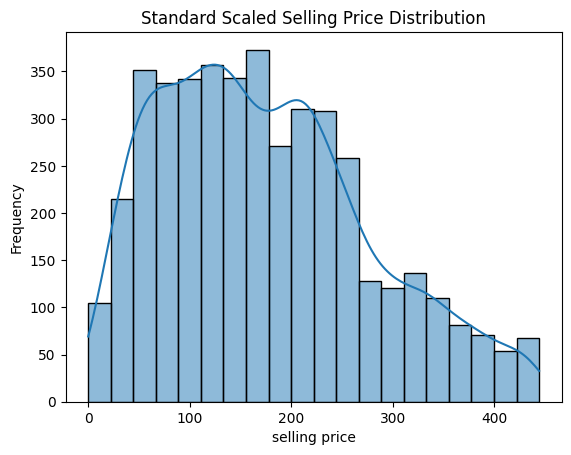

In [ ]:
sn.histplot(car['std_selling_price'], bins = 20, edgecolor = 'black', kde=True)
plt.title('Standard Scaled Selling Price Distribution')
plt.xlabel('selling price')
plt.ylabel('Frequency')
plt.show()

### Normalization

Two types of Normalization:

     Mean Normalization ,

     Min-Max Normalization,


### Task# 11

a. Apply min-max scaling on Killometer driven field.

b. Apply mean scaling on killometer driven field.

c. Do you observe any difference?

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
car['min_max_scaled_km'] = scaler.fit_transform(car[['km_driven']])
car